Derivada de orden 1: 4*x**3 + 9*x**2 - 2
Derivada de orden 2: 12*x**2 + 18*x
Derivada de orden 3: 24*x + 18


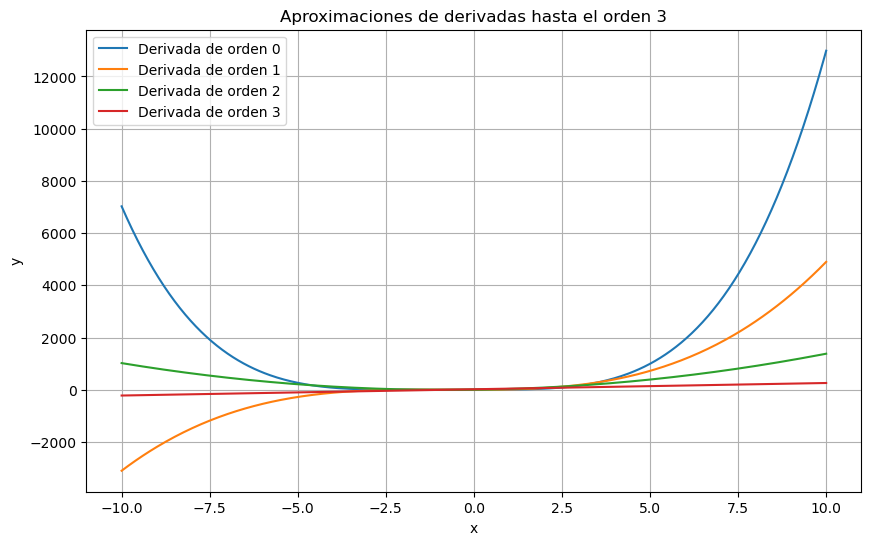

In [5]:
import sympy as sp
import matplotlib.pyplot as plt
import numpy as np

def derivadas_iterativas(funcion, variable, N):
    # Lista para almacenar las derivadas
    derivadas = [funcion]

    # Iterar N veces para calcular la derivada de la derivada
    for i in range(N):
        nueva_derivada = sp.diff(derivadas[-1], variable)
        derivadas.append(nueva_derivada)
        print(f"Derivada de orden {i + 1}: {nueva_derivada}")

    return derivadas

# Definir la variable simbólica y la función
x = sp.symbols('x')
f = x**4 + 3*x**3 - 2*x + 5

# Número de derivadas a calcular (N)
N = int(input("Ingrese el número de derivadas (N): "))

# Calcular derivadas iterativas
derivadas = derivadas_iterativas(f, x, N)

# Crear funciones numéricas para graficar
x_vals = np.linspace(-10, 10, 400)
funciones = [sp.lambdify(x, derivada, 'numpy') for derivada in derivadas]

# Gráfica
plt.figure(figsize=(10, 6))
for i, funcion in enumerate(funciones):
    plt.plot(x_vals, funcion(x_vals), label=f'Derivada de orden {i}')

# Etiquetas y leyenda
plt.title(f'Aproximaciones de derivadas hasta el orden {N}')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid()
plt.show()


Derivada de orden 1: -50*x/(25*x**2 + 1)**2
Derivada de orden 2: 5000*x**2/(25*x**2 + 1)**3 - 50/(25*x**2 + 1)**2
Derivada de orden 3: -750000*x**3/(25*x**2 + 1)**4 + 15000*x/(25*x**2 + 1)**3
Derivada de orden 4: 150000000*x**4/(25*x**2 + 1)**5 - 4500000*x**2/(25*x**2 + 1)**4 + 15000/(25*x**2 + 1)**3
Derivada de orden 5: -37500000000*x**5/(25*x**2 + 1)**6 + 1500000000*x**3/(25*x**2 + 1)**5 - 11250000*x/(25*x**2 + 1)**4
Polinomio de Taylor de orden 5: 625*x**4 - 25*x**2 + 1


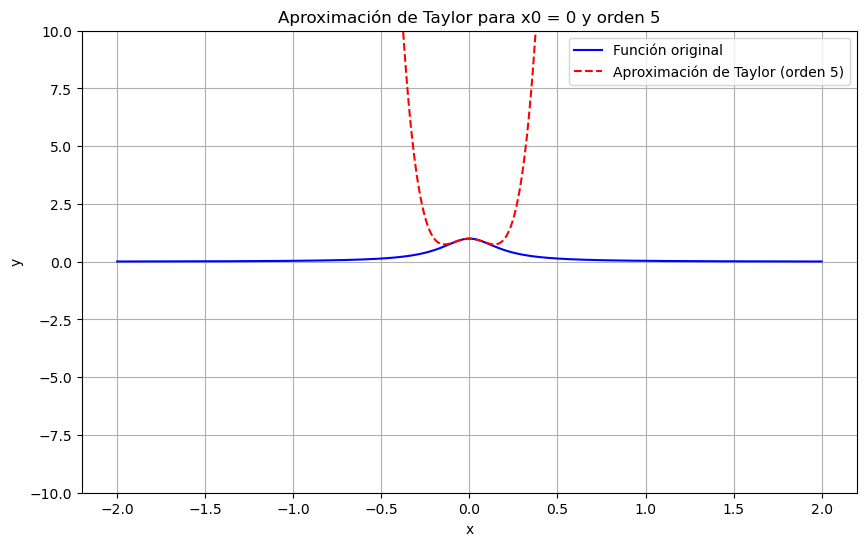

In [21]:
import sympy as sp
import matplotlib.pyplot as plt
import numpy as np

def derivadas_iterativas(funcion, variable, N):
    # Lista para almacenar las derivadas
    derivadas = [funcion]

    # Iterar N veces para calcular la derivada de la derivada
    derivada_actual = funcion
    for i in range(N):
        derivada_actual = sp.diff(derivada_actual, variable)
        derivadas.append(derivada_actual)
        print(f"Derivada de orden {i + 1}: {derivada_actual}")

    return derivadas

def aproximacion_taylor(derivadas, variable, x0, N):
    # Crear el polinomio de Taylor
    polinomio_taylor = 0
    for i in range(N + 1):
        derivada_i = derivadas[i]
        termino = (derivada_i.subs(variable, x0) / sp.factorial(i)) * (variable - x0)**i
        polinomio_taylor += termino
    return sp.simplify(polinomio_taylor)

# Definir la variable simbólica y la función
x = sp.symbols('x')
f = 1 / (25 * (x**2) + 1)

# Punto de expansión x0 = 0
x0 = 0

# Número de derivadas a calcular (N)
N = int(input("Ingrese el número de derivadas (N): "))

# Calcular derivadas iterativas
derivadas = derivadas_iterativas(f, x, N)

# Construir la aproximación de Taylor
taylor_aprox = aproximacion_taylor(derivadas, x, x0, N)
print(f"Polinomio de Taylor de orden {N}: {taylor_aprox}")

# Crear funciones numéricas para la función original y la aproximación de Taylor
funcion_original = sp.lambdify(x, f, 'numpy')
taylor_funcion = sp.lambdify(x, taylor_aprox, 'numpy')

# Generar valores de x para graficar
x_vals = np.linspace(-2, 2, 400)

# Graficar la función original y la aproximación de Taylor
plt.figure(figsize=(10, 6))
plt.plot(x_vals, funcion_original(x_vals), label='Función original', color='blue')
plt.plot(x_vals, taylor_funcion(x_vals), label=f'Aproximación de Taylor (orden {N})', color='red', linestyle='--')

# Etiquetas y leyenda
plt.title(f'Aproximación de Taylor para x0 = {x0} y orden {N}')
plt.xlabel('x')
plt.ylabel('y')
plt.ylim(-10,10)
plt.legend()
plt.grid()
plt.show()
